In [1]:
using POMDPs
using LaserTag
using ParticleFilters
using POMDPToolbox
using Interact
using POMCPOW

In [81]:
p = gen_lasertag(rng=MersenneTwister(1), reading_std=2.5)
filter = SimpleParticleFilter(p, LowVarianceResampler(100000), rng=MersenneTwister(5))

ro = MoveTowards()
solver = POMCPOWSolver(tree_queries=100_000,
                       criterion=MaxUCB(20.0),
                       final_criterion=MaxTries(),
                       max_depth=100,
                       enable_action_pw=false,
                       k_observation=8.0,
                       alpha_observation=1/20,
                       estimate_value=FORollout(ro),
                       check_repeat_act=false,
                       check_repeat_obs=false,
                       rng=MersenneTwister(13)
                      )
policy = solve(solver, p)

policy = MoveTowardsSampled(MersenneTwister(5))

hr = HistoryRecorder(max_steps=100,
                     show_progress=true,
                     rng=MersenneTwister(6))
hist = simulate(hr, p, policy, filter)
ns = n_steps(hist)-1

Simulating...100%|██████████████████████████████████████| Time: 0:00:03


47

In [82]:
i=0

0

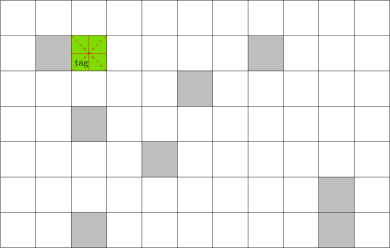

In [129]:
i+=1
s = state_hist(hist)[i+1]
o = observation_hist(hist)[i]
a = action_hist(hist)[i+1]
b = belief_hist(hist)[i+1]
r = reward_hist(hist)[i+1]
LaserTagVis(p, s=s, a=a, o=o, b=b)

-17.307655042074458